# Day 1: Reading data into a kernel

In [1]:
import pandas as pd

df = pd.read_csv('../cereal.csv')

In [2]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [4]:
# that was easy

# Day 2: Plot a Numeric Variable with a Histogram

In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cereal count')

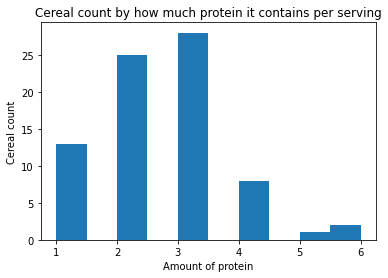

In [6]:
plt.hist(df['protein'])
plt.title('Cereal count by how much protein it contains per serving')
plt.xlabel('Amount of protein')
plt.ylabel('Cereal count')

# Day 3: Perform a t-test

In [7]:
from scipy.stats import ttest_ind

In [8]:
df['type'].unique()

array(['C', 'H'], dtype=object)

In [9]:
hot_cereals = df[df['type'] == 'H']
cold_cereals = df[df['type'] == 'C']

# do hot and cold cereals have the same distribution for amounts of sodium?
t_res = ttest_ind(hot_cereals['sodium'],
                  cold_cereals['sodium'],
                  equal_var=False)
print(f'P-value for sodium distributions across hot/cold cereals is {t_res.pvalue:.3f}')

P-value for sodium distributions across hot/cold cereals is 0.024


Text(0, 0.5, 'Cereal count')

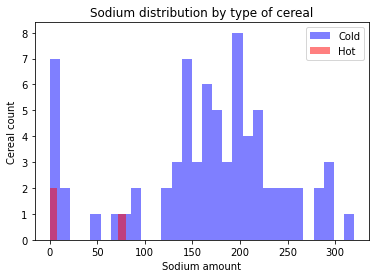

In [10]:
# extra credit

plt.hist(cold_cereals['sodium'], bins=30, fc=(0, 0, 1, 0.5), label='Cold')
plt.hist(hot_cereals['sodium'], bins=10, fc=(1, 0, 0, 0.5), label='Hot')
plt.legend(loc='best')
plt.title('Sodium distribution by type of cereal')
plt.xlabel('Sodium amount')
plt.ylabel('Cereal count')

In [11]:
# clearly, hot cereals have way less sodium than cold cereals...

# Day 4: Visualize categorical data with a bar chart

Text(0, 0.5, 'Count')

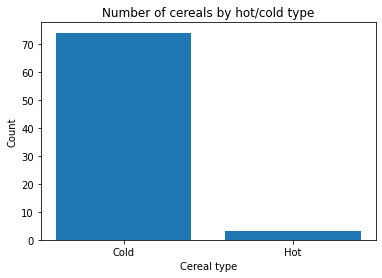

In [12]:
count_of_cereals = df.groupby('type').agg({'type': 'count'})
count_array = count_of_cereals.values.squeeze().tolist()
cereal_type_array = (count_of_cereals.index
                                     .to_series()
                                     .replace({'H': 'Hot',
                                               'C': 'Cold',
                                               })
                     )

plt.bar(cereal_type_array, count_array)
plt.title('Number of cereals by hot/cold type')
plt.xlabel('Cereal type')
plt.ylabel('Count')

Text(0, 0.5, 'Sugars')

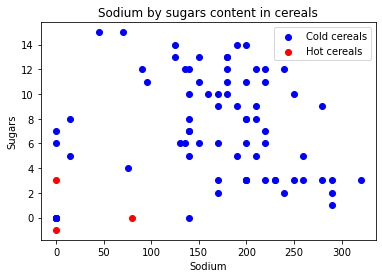

In [13]:
# extra credit

x='sodium'
y='sugars'

plt.scatter(x=cold_cereals[x],
            y=cold_cereals[y],
            c='b',
            label='Cold cereals'
            )
plt.scatter(x=hot_cereals[x],
            y=hot_cereals[y],
            c='r',
            label='Hot cereals'
            )
plt.legend(loc='best')
plt.title(f'{x.capitalize()} by {y} content in cereals')
plt.xlabel(x.capitalize())
plt.ylabel(y.capitalize())

# Day 5: Using a Chi-Square Test

In [14]:
from scipy.stats import chi2_contingency

In [15]:
# first, let's create our own categoricals

df['High Sodium'] = df['sodium'] > df['sodium'].mean()
df['High Calories'] = df['calories'] > df['calories'].mean()

In [16]:
confusion_matrix = pd.crosstab(df['High Sodium'], df['High Calories'])
confusion_matrix

High Calories,False,True
High Sodium,,
False,19,13
True,11,34


In [17]:
chi2_result = chi2_contingency(confusion_matrix)
print(f'Chi-squared result: {chi2_result[0]:.3f}, p-value: {chi2_result[1]:.3f}')

Chi-squared result: 8.182, p-value: 0.004


In [18]:
# clearly high sodium is correlated with high calories.

Text(0, 0.5, 'Calories')

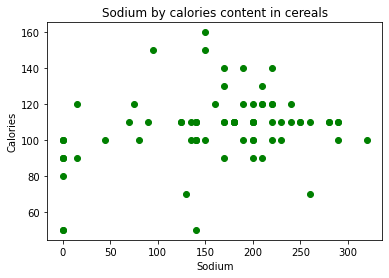

In [19]:
# extra credit

x='sodium'
y='calories'

plt.scatter(x=df[x],
            y=df[y],
            c='g',
            )
plt.title(f'{x.capitalize()} by {y} content in cereals')
plt.xlabel(x.capitalize())
plt.ylabel(y.capitalize())